In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets, linear_model

In [11]:
df= pd.read_csv("C:/Users/Admin/Downloads/17_Dang Pham Huy Hoang_Ch3_LR.csv")
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,6,2


In [4]:
df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [12]:
df.room_type=df.room_type.map({'Private room':1,'Entire home/apt':2, 'Shared room':3})

In [22]:
df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [23]:
df.neighbourhood_group=df.neighbourhood_group.map({'Brooklyn':1,'Manhattan':2, 'Queens':3, 'Staten Island':4,'Bronx':5})

In [24]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,1,Kensington,40.64749,-73.97237,1,149,1,9,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,2,Midtown,40.75362,-73.98377,2,225,1,45,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,2,Harlem,40.80902,-73.94190,1,150,3,0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,1,Clinton Hill,40.68514,-73.95976,2,89,1,270,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,2,East Harlem,40.79851,-73.94399,2,80,10,9,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,1,Bedford-Stuyvesant,40.67853,-73.94995,1,70,2,0,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,1,Bushwick,40.70184,-73.93317,1,40,4,0,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,2,Harlem,40.81475,-73.94867,2,115,10,0,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,2,Hell's Kitchen,40.75751,-73.99112,3,55,1,0,6,2


In [15]:
df.isnull().sum()

id                                 0
name                              16
host_id                            0
host_name                         21
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

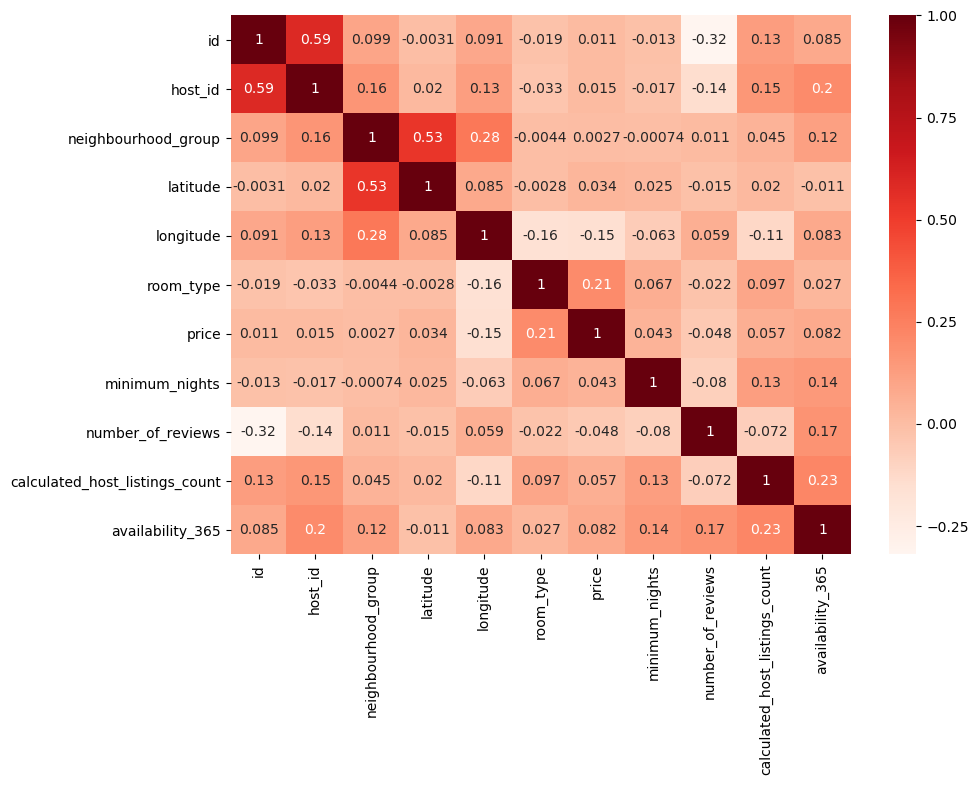

In [28]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.Reds)
plt.show()

In [33]:
X=df[['room_type']]
Y=df['price']

In [34]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X,Y)

LinearRegression()

In [35]:
#Parameter of the model
print('R square:', lm.score(X,Y)) #Giai thich dc su thay doi gia bao nhieu %
print('Slope:', lm.coef_) #He so hoi quy
print('Intercep_:', lm.intercept_) #he so chan, gia tri Y khi bien doc lap = 0

R square: 0.042447153537723326
Slope: [91.41497657]
Intercep_: 9.463070562476133


In [37]:
#Using the model to predict price
Y_pred=lm.predict(X)
Y_pred=pd.DataFrame(Y_pred, columns=['Price_predict'])
#Compare with the true price
result_compare=pd.concat([X,Y,Y_pred], axis=1)
result_compare['Deviation']=result_compare['Price_predict']-result_compare['price']
result_compare

,room_type,price,Price_predict,Deviation
0,1,149,100.878047,-48.121953
1,2,225,192.293024,-32.706976
2,1,150,100.878047,-49.121953
3,2,89,192.293024,103.293024
4,2,80,192.293024,112.293024
...,...,...,...,...
48890,1,70,100.878047,30.878047
48891,1,40,100.878047,60.878047
48892,2,115,192.293024,77.293024
48893,3,55,283.708000,228.708000


In [38]:
result_compare['Deviation'].sum()

-8.731149137020111e-10